## Linear Regression using tensorflow

#### Assume we want to predict the values from the given below equation
z = 7y + 6x + 8

#### Given x, y, and z, let it run, train the model
#### For any given x and y values it predicts the z value 

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# 100 random points between -5 and +5
x = np.random.uniform(low=-5, high=5, size=(100,1))
print(x)

[[-2.90878583]
 [-1.78639179]
 [-4.07506689]
 [-3.57272836]
 [ 4.72601024]
 [-3.99424681]
 [-0.17144505]
 [ 0.4350723 ]
 [-0.30073628]
 [ 2.97425379]
 [-2.89663961]
 [-4.31702597]
 [ 0.97867737]
 [ 4.42161926]
 [ 4.6941475 ]
 [-2.13049545]
 [ 4.70345539]
 [-3.31463029]
 [ 1.05193163]
 [ 2.85724581]
 [-4.22902155]
 [ 0.38569645]
 [-4.31038625]
 [-4.40068076]
 [ 4.67441697]
 [-1.70423371]
 [-1.94969518]
 [ 4.26594658]
 [ 2.20115492]
 [-3.45990552]
 [ 0.72242393]
 [-4.16802646]
 [ 4.32310878]
 [-2.15029446]
 [ 3.42000475]
 [-0.38911883]
 [ 4.62437581]
 [-3.32045987]
 [-0.31729378]
 [ 0.05447983]
 [ 2.84234675]
 [-4.95914303]
 [-2.73665899]
 [ 0.1410154 ]
 [ 1.58016416]
 [-1.81304718]
 [-2.18968264]
 [ 2.92341814]
 [ 0.21809243]
 [-4.36309585]
 [ 4.65721475]
 [-3.47016833]
 [-2.14954331]
 [ 0.02348173]
 [ 3.99634152]
 [ 3.67733605]
 [ 3.76128434]
 [ 3.01094883]
 [ 3.3592859 ]
 [ 1.27906037]
 [ 0.33360746]
 [ 3.07209351]
 [-0.74737004]
 [ 3.28687143]
 [-4.16273505]
 [-4.61205166]
 [-3.85605

In [5]:
x[:5,:].round(2)

array([[-2.91],
       [-1.79],
       [-4.08],
       [-3.57],
       [ 4.73]])

In [6]:
y = np.random.uniform(low=-5, high=5, size=(100,1))
print(y)

[[ 0.36958594]
 [-0.52732483]
 [ 4.31261016]
 [-1.18098937]
 [-3.64730401]
 [-0.44634911]
 [-3.87611145]
 [-1.83851073]
 [ 3.5477981 ]
 [ 1.30179918]
 [ 1.12973147]
 [-1.84079448]
 [ 0.13281728]
 [ 0.11984877]
 [ 2.54842704]
 [-4.32040058]
 [-2.0567685 ]
 [ 0.16539687]
 [-0.69083479]
 [-3.46491301]
 [ 3.24512977]
 [-3.67046449]
 [-3.27991597]
 [ 0.41547151]
 [-4.42899358]
 [ 0.29727795]
 [ 4.91891878]
 [-1.49257343]
 [-1.64580263]
 [-4.59417066]
 [ 3.51697659]
 [-2.78467112]
 [ 1.69032401]
 [-4.51545054]
 [ 3.37891551]
 [ 3.32621358]
 [ 1.19070294]
 [ 2.44325527]
 [-3.38698097]
 [-1.74555018]
 [-4.26317334]
 [-1.71201921]
 [ 1.66867474]
 [-0.24752451]
 [-1.64414894]
 [-4.96721469]
 [ 0.28445876]
 [ 3.01982316]
 [-4.39931307]
 [ 3.2588502 ]
 [ 2.41614468]
 [-2.71710088]
 [ 2.98938772]
 [ 4.8594927 ]
 [-2.96926492]
 [ 2.09066694]
 [ 2.5958809 ]
 [ 2.3859157 ]
 [ 3.39046634]
 [ 2.7495594 ]
 [-3.78096206]
 [ 4.07432212]
 [ 2.94613409]
 [ 2.88573923]
 [-0.196162  ]
 [ 3.3055605 ]
 [ 3.71351

In [7]:
noise = np.random.uniform(low=-1, high=1, size=(100,1))
print(noise)

[[-3.26723797e-01]
 [-7.46932969e-01]
 [-2.53000275e-01]
 [ 8.10060502e-01]
 [ 3.21121752e-01]
 [-6.79974508e-01]
 [ 9.69306773e-01]
 [-6.17158324e-01]
 [ 8.27183606e-01]
 [-7.18189364e-01]
 [ 8.35038705e-01]
 [-8.37192924e-01]
 [ 5.26872136e-01]
 [ 1.78071268e-01]
 [ 6.53982409e-01]
 [-1.11427222e-01]
 [ 4.23636802e-01]
 [ 4.71568722e-01]
 [ 5.84106967e-01]
 [ 6.48614031e-01]
 [-2.46904796e-01]
 [ 2.25488936e-01]
 [ 2.45144920e-01]
 [ 9.74134036e-01]
 [ 9.54298483e-01]
 [ 9.30945954e-01]
 [ 7.18399149e-01]
 [ 1.74693106e-01]
 [-6.23172765e-01]
 [-5.60274742e-01]
 [-5.76277622e-01]
 [-4.06853331e-01]
 [ 5.01760871e-01]
 [ 6.98160030e-01]
 [-5.56276245e-01]
 [ 9.85321657e-01]
 [-3.53781999e-01]
 [ 8.28139337e-01]
 [ 9.57879610e-01]
 [ 8.81278567e-02]
 [ 3.28699588e-01]
 [ 2.71926230e-01]
 [-1.49382733e-01]
 [-9.31495518e-01]
 [ 5.60402994e-01]
 [-8.07810292e-02]
 [-5.32137144e-01]
 [ 5.41870372e-01]
 [ 6.88511213e-01]
 [-5.90444360e-01]
 [-8.78389339e-01]
 [ 7.59098378e-01]
 [ 9.2557711

In [9]:
# lets create z array to train the model
z = 7*y + 6*x + 8 + noise

In [10]:
input = np.column_stack((x,y))
input

array([[-2.90878583,  0.36958594],
       [-1.78639179, -0.52732483],
       [-4.07506689,  4.31261016],
       [-3.57272836, -1.18098937],
       [ 4.72601024, -3.64730401],
       [-3.99424681, -0.44634911],
       [-0.17144505, -3.87611145],
       [ 0.4350723 , -1.83851073],
       [-0.30073628,  3.5477981 ],
       [ 2.97425379,  1.30179918],
       [-2.89663961,  1.12973147],
       [-4.31702597, -1.84079448],
       [ 0.97867737,  0.13281728],
       [ 4.42161926,  0.11984877],
       [ 4.6941475 ,  2.54842704],
       [-2.13049545, -4.32040058],
       [ 4.70345539, -2.0567685 ],
       [-3.31463029,  0.16539687],
       [ 1.05193163, -0.69083479],
       [ 2.85724581, -3.46491301],
       [-4.22902155,  3.24512977],
       [ 0.38569645, -3.67046449],
       [-4.31038625, -3.27991597],
       [-4.40068076,  0.41547151],
       [ 4.67441697, -4.42899358],
       [-1.70423371,  0.29727795],
       [-1.94969518,  4.91891878],
       [ 4.26594658, -1.49257343],
       [ 2.20115492,

In [16]:
#single layer, single neuron network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1)
])

In [17]:
model.compile(
    optimizer = 'sgd',
    loss = 'mean_squared_error',
    metrics = ['mse'],
)

In [18]:
history = tf.keras.callbacks.History()

In [19]:
model.fit(input, z, epochs = 30, verbose=1, validation_split=0.2, callbacks=[history])

Train on 80 samples, validate on 20 samples
Epoch 1/30
80/80 [==============================] - 1s 12ms/sample - loss: 833.2064 - mse: 833.2064 - val_loss: 281.9732 - val_mse: 281.9732
Epoch 2/30
80/80 [==============================] - 0s 339us/sample - loss: 282.1065 - mse: 282.1065 - val_loss: 121.1167 - val_mse: 121.1167
Epoch 3/30
80/80 [==============================] - 0s 270us/sample - loss: 110.3492 - mse: 110.3492 - val_loss: 69.9723 - val_mse: 69.9723
Epoch 4/30
80/80 [==============================] - 0s 201us/sample - loss: 62.5349 - mse: 62.5349 - val_loss: 50.1646 - val_mse: 50.1646
Epoch 5/30
80/80 [==============================] - 0s 335us/sample - loss: 45.6407 - mse: 45.6407 - val_loss: 40.4291 - val_mse: 40.4291
Epoch 6/30
80/80 [==============================] - 0s 431us/sample - loss: 37.7157 - mse: 37.7157 - val_loss: 33.8324 - val_mse: 33.8324
Epoch 7/30
80/80 [==============================] - 0s 555us/sample - loss: 32.6062 - mse: 32.6062 - val_loss: 29.7208 

In [20]:
 print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


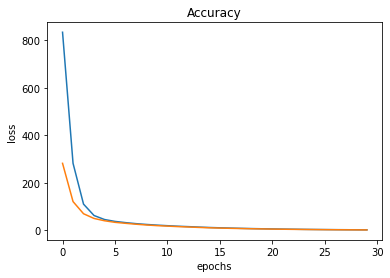

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

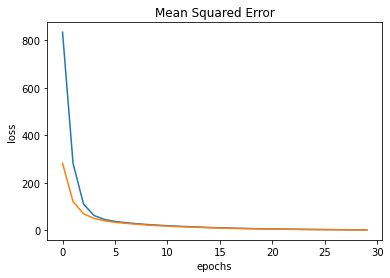

In [24]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Mean Squared Error')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

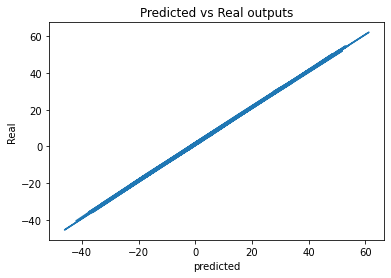

In [25]:
# Predicted output vs real output
# https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html
plt.plot(np.squeeze(model.predict_on_batch(input)), np.squeeze(z))
plt.title('Predicted vs Real outputs')
plt.xlabel('predicted')
plt.ylabel('Real')
plt.show()

In [26]:
# z = 7*y + 6*x + 8
# for values of (x,y) as (2,3) the value of z = 7*2+6*3+8 = 40
# lets test this for the model, which is trained
y_pred = model.predict([[2,3]])
y_pred

array([[39.850334]], dtype=float32)